In [ ]:
# Step 1: Install Ultralytics (YOLOv5/8)
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.1 MB/s eta 0:00:00


In [ ]:
from pathlib import Path


In [ ]:
# Step 2: Import libraries
from ultralytics import YOLO
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Step 3: Download the COCO128 dataset (1-time)
!curl -L https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip -o coco128.zip
!unzip -q coco128.zip -d ./  # Extract to /content/coco128

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6819k  100 6819k    0     0  13.2M      0 --:--:-- --:--:-- --:--:-- 13.2M


In [ ]:
# Step 3: Download COCO128 dataset (auto)
model = YOLO("yolov5s.pt")  # Or 'yolov5su.pt' for better performance

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 152MB/s]


In [ ]:
image_folder = Path("coco128/images/train2017")
image_paths = list(image_folder.glob("*.jpg"))

In [ ]:
# Step 5: Run detection on first 5 images
for image_path in image_paths[:5]:
    results = model(str(image_path))
    detections = results[0].boxes
    class_names = model.names


image 1/1 /content/coco128/images/train2017/000000000382.jpg: 480x640 2 persons, 2 backpacks, 1 skis, 609.1ms
Speed: 8.0ms preprocess, 609.1ms inference, 38.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/coco128/images/train2017/000000000086.jpg: 640x512 1 person, 1 bicycle, 1 motorcycle, 477.7ms
Speed: 2.5ms preprocess, 477.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 /content/coco128/images/train2017/000000000394.jpg: 640x640 1 dog, 1 frisbee, 571.8ms
Speed: 2.9ms preprocess, 571.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/coco128/images/train2017/000000000488.jpg: 416x640 5 persons, 1 sports ball, 1 baseball bat, 1 baseball glove, 365.3ms
Speed: 2.0ms preprocess, 365.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /content/coco128/images/train2017/000000000073.jpg: 640x576 2 motorcycles, 505.7ms
Speed: 2.6ms preprocess, 505.7ms inference, 1.6ms po

In [ ]:
for image_path in image_paths[:5]:
    results = model(str(image_path))
    detections = results[0].boxes
    class_names = model.names

    # Print what was detected
    if detections and len(detections.cls) > 0:
        labels = []
        for cls_id, conf in zip(detections.cls, detections.conf):
            label = f"{class_names[int(cls_id)]} ({conf*100:.1f}%)"
            labels.append(label)
        print(f"📸 {image_path.name} - Detected:", ", ".join(labels))
    else:
        print(f"⚠️ {image_path.name} - No objects detected.")



image 1/1 /content/coco128/images/train2017/000000000382.jpg: 480x640 2 persons, 2 backpacks, 1 skis, 417.5ms
Speed: 2.2ms preprocess, 417.5ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
📸 000000000382.jpg - Detected: person (84.2%), skis (63.4%), person (42.0%), backpack (32.8%), backpack (25.2%)

image 1/1 /content/coco128/images/train2017/000000000086.jpg: 640x512 1 person, 1 bicycle, 1 motorcycle, 442.9ms
Speed: 2.4ms preprocess, 442.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)
📸 000000000086.jpg - Detected: person (85.1%), bicycle (64.4%), motorcycle (27.9%)

image 1/1 /content/coco128/images/train2017/000000000394.jpg: 640x640 1 dog, 1 frisbee, 568.8ms
Speed: 3.0ms preprocess, 568.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
📸 000000000394.jpg - Detected: frisbee (97.8%), dog (68.0%)

image 1/1 /content/coco128/images/train2017/000000000488.jpg: 416x640 5 persons, 1 sports ball, 1 baseball bat, 1 baseball glove

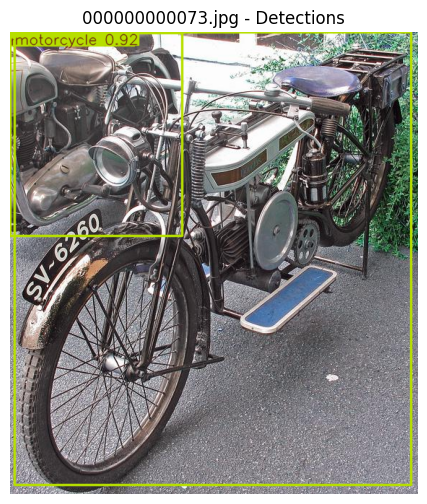

In [ ]:
    plt.figure(figsize=(8, 6))
    plt.imshow(results[0].plot())
    plt.axis("off")
    plt.title(f"{image_path.name} - Detections")
    plt.show()

Saving cat.jpg to cat.jpg
🔍 Detecting on uploaded image: cat.jpg

image 1/1 /content/cat.jpg: 640x640 1 cat, 553.4ms
Speed: 12.9ms preprocess, 553.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
→ cat (84.1%)


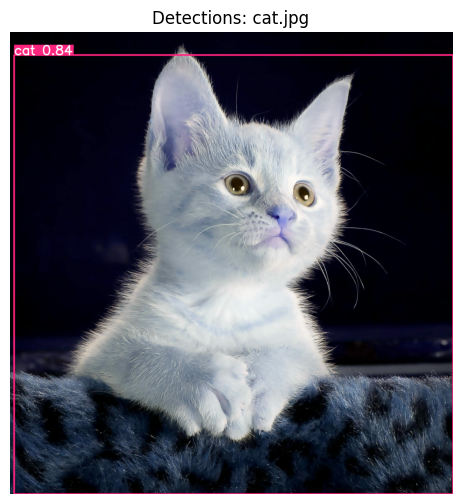

In [ ]:
# Upload one or more images from your local drive
from google.colab import files
uploaded_images = files.upload()  # opens file picker

# Run detection on each uploaded image, using the `model` you previously loaded
import matplotlib.pyplot as plt

for filename in uploaded_images.keys():
    print(f"🔍 Detecting on uploaded image: {filename}")

    # Inference
    results = model(filename)

    # Text summary
    boxes = results[0].boxes
    names = model.names
    if len(boxes.cls) > 0:
        summary = ", ".join(
            f"{names[int(c)]} ({float(conf)*100:.1f}%)"
            for c, conf in zip(boxes.cls, boxes.conf)
        )
    else:
        summary = "No objects detected."
    print("→", summary)

    # Visual output
    plt.figure(figsize=(8,6))
    plt.imshow(results[0].plot())
    plt.axis('off')
    plt.title(f"Detections: {filename}")
    plt.show()
